<a href="https://colab.research.google.com/github/dwihdyn/algo-trading/blob/master/master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference : https://www.oreilly.com/library/view/hands-on-algorithmic-trading/9781492082637/** 

Module 2 & 4

Summary :
1.   Get Stock price from alphavantage API
2.   Rename data column
3.   Convert prices from string to float
4.   Convert the index to date
5.   Visualise data in time series
6.   Create & calculate SMA10 & SMA20
7.   Sort the data with the date, ascending order
8.   Recalculate SMA10 & SMA20 due to sort data
9.   Remove any NaN values in SMA10 & SMA20


***IMPORT MODULES***

In [0]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

***IMPORT MSFT DATA FROM ALPHAVANTAGE***

In [2]:
response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=RKKWDNO3XD91IUBZ")
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [3]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2020-01-03 to 2019-08-13
Data columns (total 5 columns):
1. open      100 non-null object
2. high      100 non-null object
3. low       100 non-null object
4. close     100 non-null object
5. volume    100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB


***RENAME THE (BAD) NAMING COLUMN ['1. open', ...] -> ['open', ...]***


In [4]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [5]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

***CONVERT PRICES FROM STRING TO FLOAT***

In [6]:
stock = stock.astype(float)
type(stock['close'][1])

numpy.float64

***CONVERT THE INDEX TO DATE***

In [7]:
# type(stock.index) # check that its index
stock.index = pd.to_datetime(stock.index)
type(stock.index) # now check that now is date

pandas.core.indexes.datetimes.DatetimeIndex


***SHOW 10 SAMPLE DATA BY RANDOM***


In [8]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2019-11-27,152.33,152.5000,151.520,152.32,15201293.0
2019-10-01,139.66,140.2500,137.000,137.07,22581929.0
2019-12-12,151.65,153.4400,151.020,153.24,24645366.0
2019-08-13,136.05,138.8000,135.000,138.60,25496593.0
2019-09-10,136.80,136.8862,134.510,136.08,28903378.0
2019-08-20,138.21,138.7100,137.240,137.26,21188998.0
2019-10-16,140.79,140.9900,139.530,140.41,20841687.0
2019-11-21,149.40,149.8000,148.501,149.48,18576083.0
2019-10-07,137.14,138.1800,137.020,137.12,16601284.0
2019-11-05,144.97,145.0200,143.905,144.46,18250172.0


***SUMMARISE DATA***

In [9]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,143.989429,144.795037,142.885844,143.942550,2.261601e+07
std,7.306040,7.308945,7.608383,7.543238,6.615946e+06
min,134.390000,134.580000,132.250000,133.390000,8.989150e+06
25%,137.832500,138.692500,136.552475,137.602500,1.795236e+07
50%,140.575000,141.535000,139.525000,140.570000,2.182878e+07
75%,150.182500,150.962500,149.270000,150.062500,2.551021e+07
max,159.450000,160.730000,158.330000,160.620000,5.359961e+07


***VISUALISE DATA***

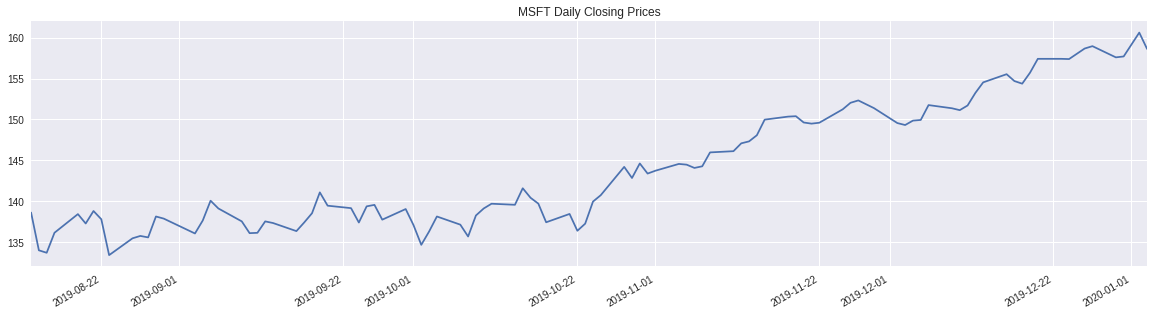

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b1ff481d0>, None)

In [10]:
stock['close'].plot(figsize=(20,5), title='MSFT Daily Closing Prices'),plt.show()

***EXPLORING SIGNALS : SMA CROSSOVER***

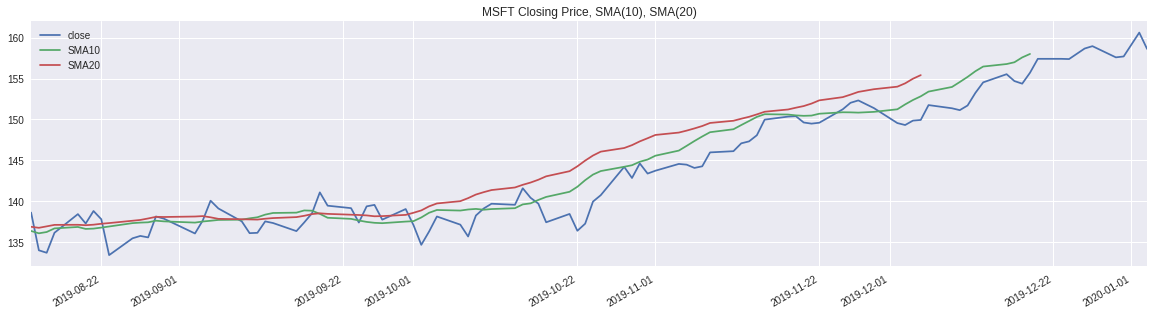

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b1fa44898>, None)

In [11]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()
# stock # NaN because it takes mean of n period FORWARD, alphavantage issue on data importing

***SORT DATA BY DATE ASCENDING & PLOT RIGHT CHART***

In [12]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2020-01-03,158.3200,159.945,158.06,158.62,21121681.0,NaN,NaN
2020-01-02,158.7800,160.730,158.33,160.62,22634546.0,NaN,NaN
2019-12-31,156.7700,157.770,156.45,157.70,18393383.0,NaN,NaN
2019-12-30,158.9865,159.020,156.73,157.59,16356720.0,NaN,NaN
2019-12-27,159.4500,159.550,158.22,158.96,18414352.0,NaN,NaN


In [13]:
stock = stock.sort_index(ascending=True)
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-08-13,136.050,138.80,135.000,138.60,25496593.0,136.347,136.8585
2019-08-14,136.360,136.92,133.670,133.98,32527251.0,136.061,136.7345
2019-08-15,134.390,134.58,132.250,133.68,28125416.0,136.219,136.9115
2019-08-16,134.880,136.46,134.720,136.13,25026151.0,136.663,137.0935
2019-08-19,137.855,138.55,136.885,138.41,24370543.0,136.836,137.1035


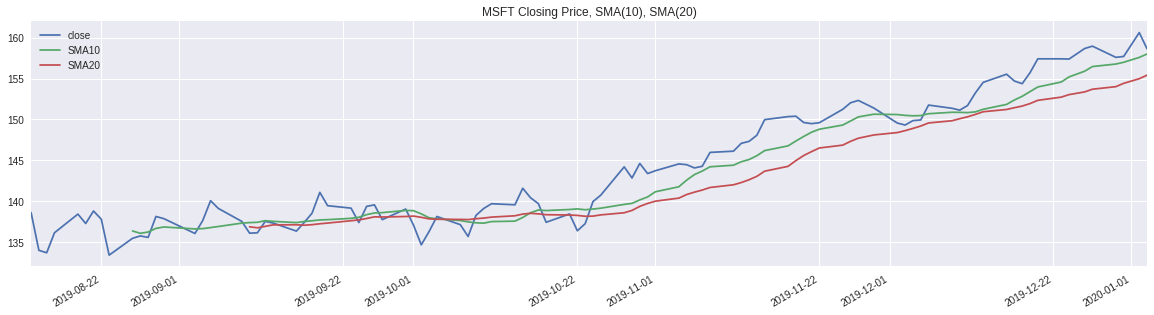

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b1f9ddc18>, None)

In [14]:
# Need to recalculate SMA

stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10','SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()

In [15]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-08-13,136.050,138.80,135.000,138.60,25496593.0,NaN,NaN
2019-08-14,136.360,136.92,133.670,133.98,32527251.0,NaN,NaN
2019-08-15,134.390,134.58,132.250,133.68,28125416.0,NaN,NaN
2019-08-16,134.880,136.46,134.720,136.13,25026151.0,NaN,NaN
2019-08-19,137.855,138.55,136.885,138.41,24370543.0,NaN,NaN


***REMOVE NaN***

              open      high     low   close      volume    SMA10     SMA20
2019-09-10  136.80  136.8862  134.51  136.08  28903378.0  137.370  136.8585
2019-09-11  135.91  136.2700  135.09  136.12  24726117.0  137.408  136.7345
2019-09-12  137.85  138.4200  136.87  137.52  27009981.0  137.604  136.9115
2019-09-13  137.78  138.0600  136.57  137.32  23363057.0  137.524  137.0935
2019-09-16  135.83  136.7000  135.66  136.33  16731440.0  137.371  137.1035


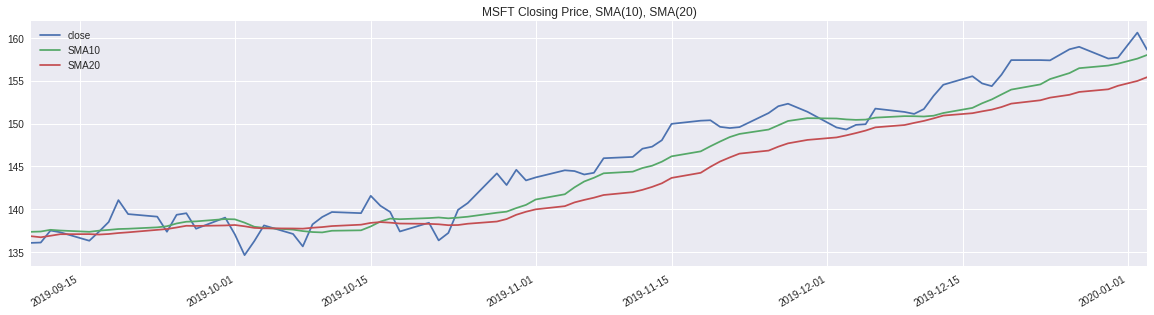

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b1e14e0b8>, None)

In [16]:
stock.dropna(inplace=True)
print(stock.head())
stock[['close', 'SMA10','SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()

***QUICK CHECK : MANUAL SMA10 VS SMA10 FROM ALPHAVANTAGE*** 

In [41]:
from IPython.display import display # display mulltiple things in one block

# pull data
response = requests.get("https://www.alphavantage.co/query?function=SMA&symbol=MSFT&interval=daily&time_period=10&series_type=close&apikey=RKKWDNO3XD91IUBZ")
alphadict = json.loads(response.text)
alphadict.keys() # get keys that need to be typed inside pd.DataFrame

# quick data cleansing
sma10 = pd.DataFrame(alphadict['Technical Analysis: SMA']).T
sma10.index = pd.to_datetime(sma10.index)
sma10 = sma10.sort_index(ascending=True)
sma10.columns = ['SMA10']
sma10.columns
sma10 = sma10.astype(float)

# show both tables
display(stock.tail()) # manual calculation
display(sma10.tail()) # alphavantage

# calculate difference. expected 0
diff = display(round(sma10['SMA10'].tail() - stock['SMA10'].tail()))




,open,high,low,close,volume,SMA10,SMA20
2019-12-27,159.4500,159.550,158.22,158.96,18414352.0,156.466,153.6930
2019-12-30,158.9865,159.020,156.73,157.59,16356720.0,156.772,154.0035
2019-12-31,156.7700,157.770,156.45,157.70,18393383.0,156.989,154.4110
2020-01-02,158.7800,160.730,158.33,160.62,22634546.0,157.582,154.9765
2020-01-03,158.3200,159.945,158.06,158.62,21121681.0,158.007,155.4150


,SMA10
2019-12-27,156.466
2019-12-30,156.772
2019-12-31,156.989
2020-01-02,157.582
2020-01-03,158.007


2019-12-27    0.0
2019-12-30    0.0
2019-12-31    0.0
2020-01-02    0.0
2020-01-03    0.0
Name: SMA10, dtype: float64

***US STOCKS PERFORMANCE BY SECTOR***

In [0]:
# pull data
response = requests.get("https://www.alphavantage.co/query?function=SECTOR&apikey=RKKWDNO3XD91IUBZ")

alphadict = json.loads(response.text)
alphadict.keys() # get keys that need to be typed inside pd.DataFrame

realTime = pd.DataFrame(alphadict['Rank A: Real-Time Performance'], index=['realTime']).T
oneDay = pd.DataFrame(alphadict['Rank B: 1 Day Performance'], index=['oneDay']).T
fiveDay = pd.DataFrame(alphadict['Rank C: 5 Day Performance'], index=['fiveDay']).T
oneMonth = pd.DataFrame(alphadict['Rank D: 1 Month Performance'], index=['oneMonth']).T
threeMonth = pd.DataFrame(alphadict['Rank E: 3 Month Performance'], index=['threeMonth']).T
yearToDate = pd.DataFrame(alphadict['Rank F: Year-to-Date (YTD) Performance'], index=['yearToDate']).T
oneYear = pd.DataFrame(alphadict['Rank G: 1 Year Performance'], index=['oneYear']).T
threeYear = pd.DataFrame(alphadict['Rank H: 3 Year Performance'],index=['threeYear']).T
fiveYear = pd.DataFrame(alphadict['Rank I: 5 Year Performance'], index=['fiveYear']).T
tenYear = pd.DataFrame(alphadict['Rank J: 10 Year Performance'], index=['tenYear']).T

# convert all data from string to float (soon)





In [144]:
allData = [realTime, oneDay, fiveDay, oneMonth, threeMonth, yearToDate, oneYear, threeYear, fiveYear, tenYear]


sector = pd.merge(realTime, oneDay, left_index=True, right_index=True)

i = 1
while i < 10:
  sector = pd.merge(sector, allData[i], left_index=True, right_index=True)
  i = i + 1

sector

,realTime,oneDay_x,oneDay_y,fiveDay,oneMonth,threeMonth,yearToDate,oneYear,threeYear,fiveYear,tenYear
Utilities,0.11%,0.11%,0.11%,-0.55%,2.62%,0.29%,-1.27%,22.86%,31.34%,34.23%,105.19%
Industrials,-0.12%,-0.12%,-0.12%,1.10%,3.19%,11.59%,1.69%,28.39%,29.95%,43.95%,187.76%
Consumer Staples,-0.17%,-0.17%,-0.17%,-1.06%,0.76%,4.01%,-0.99%,23.26%,20.45%,28.67%,133.52%
Energy,-0.34%,-0.34%,-0.34%,0.36%,6.32%,10.30%,0.51%,5.99%,-17.26%,-22.13%,6.70%
Communication Services,-0.55%,-0.55%,-0.55%,-0.22%,3.58%,12.06%,0.75%,30.24%,3.62%,19.34%,59.64%
Health Care,-0.85%,-0.85%,-0.85%,-0.96%,3.21%,15.99%,-0.66%,19.51%,48.11%,48.46%,225.86%
Consumer Discretionary,-0.85%,-0.85%,-0.85%,-0.09%,3.88%,7.28%,0.43%,25.58%,52.90%,74.20%,321.36%
Information Technology,-1.06%,-1.06%,-1.06%,0.45%,6.59%,18.06%,0.65%,48.91%,100.72%,134.71%,337.45%
Financials,-1.10%,-1.10%,-1.10%,-0.40%,2.98%,14.39%,-0.17%,28.01%,32.08%,53.12%,163.45%
Materials,-1.62%,-1.62%,-1.62%,-2.75%,0.86%,7.23%,-2.84%,17.87%,20.09%,22.58%,87.62%
